#Image Encryption using Chaos Maps

In [1]:
import numpy as np
import cv2 
import os
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from google.colab.patches import cv2_imshow
from tqdm import tqdm
import random
from PIL import Image

In [2]:
def to_Matrix(image):
    img = Image.open(image) 
    color = 1
    pixelVal = img.load()
    if type(pixelVal[0,0]) == int:
      color = 0
    imgmatrix = []
    imagesize = img.size 
    for width in range(int(imagesize[0])):
        row = []
        for height in range(int(imagesize[1])):
                row.append((pixelVal[width,height]))
        imgmatrix.append(row)
    return imgmatrix,imagesize[0],color

# Arnold Cat Chaos Mapping

 Function Used:
 (x,y) = ((x + y) mod n, (x + 2y) mod n) 

In [3]:
def Arnold_E(image, key):
    img = cv2.imread(image)
    r, c, co = img.shape
    e_img = img
    for i in range (0,key):
        new_image = np.zeros([r, c, co])
        for x in range(0, r):
            for y in range(0, c):
                new_image[x][y] = e_img[(x+y)%r][(x+2*y)%c]  
        e_img = new_image
    cv2.imwrite(image.split('.')[0] + "_AE.png", e_img)
    return e_img

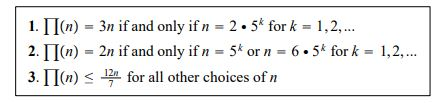

In [4]:
def Arnold_D(image, key):
    img = cv2.imread(image)
    r, c, ch = img.shape
    dim = r
    limit = dim
    if (dim%2==0) and 5**int(round(math.log(dim/2,5))) == int(dim/2):
        limit = 3*dim
    elif 5**int(round(math.log(dim,5))) == int(dim):
        limit = 2*dim
    elif (dim%6==0) and  5**int(round(math.log(dim/6,5))) == int(dim/6):
        limit = 2*dim
    else:
        limit = int(12*dim/7)
    for i in range(key,limit):
        r, c, ch = img.shape
        n = r
        new_image = np.zeros([r, c, ch])
        for x in range(0, r):
            for y in range(0, c):
                new_image[x][y] = img[(x+y)%n][(x+2*y)%n]  
        img = new_image
    cv2.imwrite(image.split('_')[0] + "_AD.png",img)
    return img

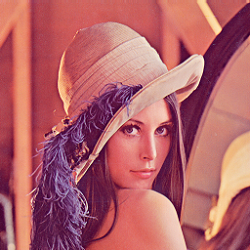

In [5]:
img = cv2.imread("Pic.png")
cv2_imshow(img)
key = 42

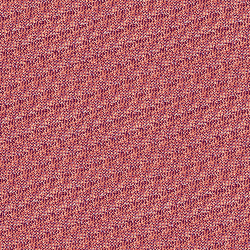

In [6]:
Arnold_EIm = Arnold_E("Pic.png", key)
cv2_imshow(Arnold_EIm)

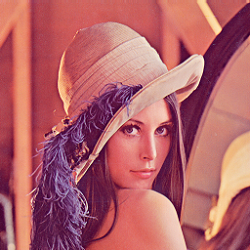

In [7]:
Arnold_DIm = Arnold_D("Pic" + "_AE.png", key)
cv2_imshow(Arnold_DIm)

#Henon Chaos Mapping

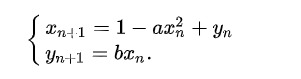

In [8]:
def makeHenonMap(dim, key):
    x = key[0]
    y = key[1]
    seqSize = dim * dim * 8
    bits = []
    decArray = []
    HMatrix = []
    for i in range(seqSize):
        xi = y + 1 - 1.4 * x**2
        yi = 0.3 * x

        x = xi
        y = yi
        if xi <= 0.4:
            bit = 0
        else:
            bit = 1
        bits.append(bit)
        if i % 8 == 7:
            decimal = 0
            for bit in bits:
                decimal = decimal * 2 + int(bit)           
            decArray.append(decimal)
            bits = []
        decArraySize = dim*8
        if i % decArraySize == decArraySize-1:
            HMatrix.append(decArray)
            decArray = []
    return HMatrix

In [9]:
def HenonE(image,key):
    imgMatrix, dim, iscolor = to_Matrix(image)
    transformMatrix = makeHenonMap(dim, key)
    newMatrix = []
    for i in range(dim):
        row = []
        for j in range(dim):
            if iscolor:
                row.append(tuple([transformMatrix[i][j] ^ x for x in imgMatrix[i][j]]))
            else:
                row.append(transformMatrix[i][j] ^ imgMatrix[i][j])
  
        newMatrix.append(row)

    if iscolor:
      im = Image.new("RGB", (dim, dim))
    else: 
      im = Image.new("L", (dim, dim))

    pix = im.load()
    for x in range(dim):
        for y in range(dim):
            pix[x, y] = newMatrix[x][y]
    im.save(image.split('.')[0] + "_HE.png", "PNG")

In [10]:
def HenonD(imageEnc, key):
    imgMatrix, dim, color = to_Matrix(imageEnc)
    transformMatrix = makeHenonMap(dim, key)
    pil_im = Image.open(imageEnc, 'r')
    imshow(np.asarray(pil_im))
    henonDImage = []
    for i in range(dim):
        row = []
        for j in range(dim):
            if color:
                row.append(tuple([transformMatrix[i][j] ^ x for x in imgMatrix[i][j]]))
            else:
                row.append(transformMatrix[i][j] ^ imgMatrix[i][j])

        henonDImage.append(row)

    if color:
        im = Image.new("RGB", (dim, dim))
    else: 
        im = Image.new("L", (dim, dim)) # L is for Black and white pixels

    pix = im.load()
    for x in range(dim):
        for y in range(dim):
            pix[x, y] = henonDImage[x][y]
    im.save(imageEnc.split('_')[0] + "_HD.png", "PNG")

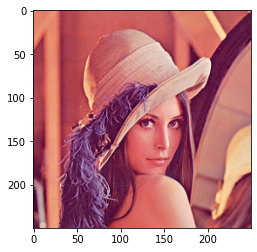

In [11]:
key = (0.1,0.1)
pil_im = Image.open("Pic.png", 'r')
imshow(np.asarray(pil_im))

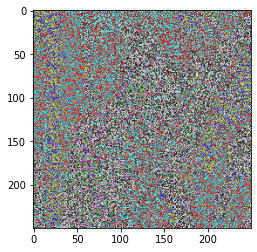

In [12]:
HenonE("Pic.png", key)
im = Image.open("Pic" + "_HE.png", 'r')
imshow(np.asarray(im))

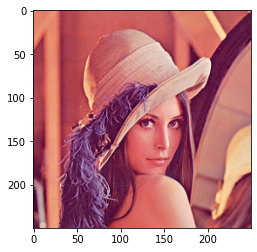

In [13]:
HenonD("Pic" + "_HE.png", key)
im = Image.open("Pic" + "_HD.png", 'r')
imshow(np.asarray(im))

# Arnold+Henon Execution

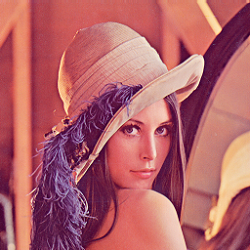

In [14]:
img = cv2.imread("Pic.png")
cv2_imshow(img)
key1 = 42

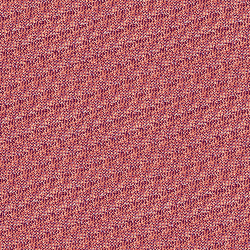

In [15]:
Arnold_EIm = Arnold_E("Pic.png", key1)
cv2_imshow(Arnold_EIm)

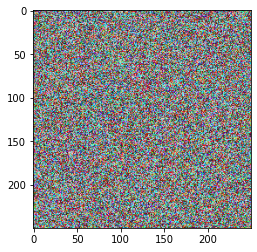

In [16]:
key2 = (0.5,0.5)
HenonE("Pic_AE.png", key2)
im = Image.open("Pic_AE" + "_HE.png", 'r')
imshow(np.asarray(im))

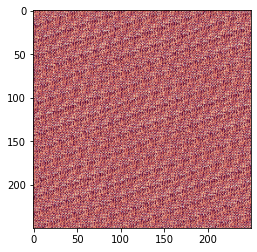

In [17]:
HenonD("Pic_AE" + "_HE.png", key2)
im = Image.open("Pic_HD.png", 'r')
imshow(np.asarray(im))

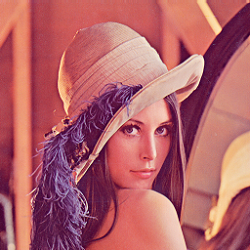

In [18]:
Arnold_DIm = Arnold_D("Pic_HD.png", key1)
cv2_imshow(Arnold_DIm)

#Combined Arnold+Henon Chaos Function


In [19]:
def ArnoldHenonE(key1, key2):
    AE = Arnold_E("Pic.png", key1)
    cv2_imshow(AE)
    HenonE("Pic_AE.png", key2)
    im = Image.open("Pic_AE" + "_HE.png", 'r')
    imshow(np.asarray(im))


def ArnoldHenonD(key1, key2):
    HenonD("Pic_AE" + "_HE.png", key2)
    im = Image.open("Pic_HD.png", 'r')
    imshow(np.asarray(im))
    Arnold_DIm = Arnold_D("Pic_HD.png", key1)
    cv2_imshow(Arnold_DIm)

In [20]:
key1 = 42
key2 = (0.5,0.5)

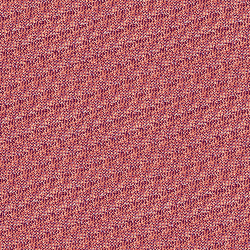

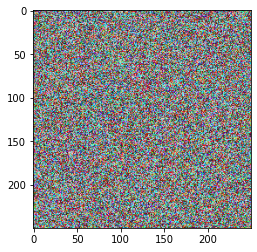

In [21]:
ArnoldHenonE(key1, key2)

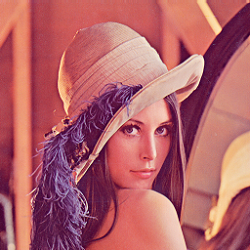

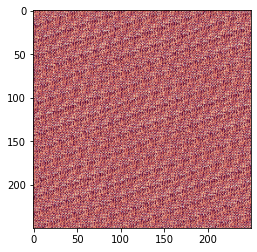

In [22]:
ArnoldHenonD(key1, key2)